In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.widgets import Cursor
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from sympy import *
plt.rcParams.update({'font.size': 12})
formatter = mticker.ScalarFormatter(useMathText=True)
plt.rcParams["axes.formatter.use_mathtext"] = True

Criação da classe Dados, que vai conter as informações

In [187]:
# Leitura de dados

class Dados:
        def __init__ (self, dados, dados_picos):
            self.dados = dados
            self.dados_picos = dados_picos

        #define os arrays com os dados
        def d(self):
            dados_array = np.array(self.dados)
            x_data = []
            y_data = []
            data = [x_data,y_data]

            for i in dados_array:
                x_data.append(float(i[0]))
                y_data.append(float(i[1]))
            return data

        def dp(self):
            dados_array = np.array(self.dados_picos)
            x_data = []
            y_data = []
            data = [x_data,y_data]

            for i in dados_array:
                x_data.append(float(i[0]))
                y_data.append(float(i[1]))
            return data
        
        # faz o ajuste dos parâmetros da função de segundo grau
        def par(self):
            def func(x, A, B):
                return A*x + B
            popt, pcov = curve_fit(
                f = func,
                xdata = self.dp()[0],
                ydata = self.dp()[1]
            )
            return popt
        
        # erros dos parâmetros
        def perr(self):
            def func(x, A, B):
                return A*x + B
            popt, pcov = curve_fit(
                f = func,
                xdata = self.dp()[0],
                ydata = self.dp()[1]
            )
            return np.sqrt(np.diag(pcov))

        # define os valores de x e y da curva ajustada
        def x_model(self):
            return np.linspace(min(self.dp()[0]), max(self.dp()[0]))  

        def y_model(self):
            def func(x, A, B):
                return A*x + B
            return func(self.x_model(), self.par()[0], self.par()[1])
        

def tabela(nome_diretorio):
    return pd.read_csv('Dados/' + nome_diretorio +'.txt', sep="\s+", header = None)

def tabela_picos(nome_diretorio):
    return pd.read_csv('Dados/' + nome_diretorio +'-picos.txt', sep="\s+", header = None)


dados3 = Dados(tabela("numerozinhos"), tabela_picos("numerozinhos"))
dados1 = Dados(tabela('zehg'), tabela_picos('zehg'))

# dados1.y_model()


In [188]:
# Leitura de dados

class DadosNA:
        def __init__ (self, dados, dados_picos):
            self.dados = dados
            self.dados_picos = dados_picos

        #define os arrays com os dados
        def d(self):
            dados_array = np.array(self.dados)
            x_data = []
            y_data = []
            data = [x_data,y_data]

            for i in dados_array:
                lambdal = float(i[0])*dados3.par()[0] + dados3.par()[1]
                x_data.append(lambdal)
                y_data.append(float(i[1]))
            return data

        def dp(self):
            dados_array = np.array(self.dados_picos)
            x_data = []
            y_data = []
            data = [x_data,y_data]

            for i in dados_array:
                x_data.append(1/(float(i[0])**2))
                lambdal = float(i[1])*dados3.par()[0] + dados3.par()[1]
                y_data.append(1/lambdal)

            return data
        
        # faz o ajuste dos parâmetros da função de segundo grau
        def par(self):
            def func(x, A, B):
                return A*x + B
            popt, pcov = curve_fit(
                f = func,
                xdata = self.dp()[0],
                ydata = self.dp()[1]
            )
            return popt
        
        # erros dos parâmetros
        def perr(self):
            def func(x, A, B):
                return A*x + B
            popt, pcov = curve_fit(
                f = func,
                xdata = self.dp()[0],
                ydata = self.dp()[1]
            )
            return np.sqrt(np.diag(pcov))

        # define os valores de x e y da curva ajustada
        def x_model(self):
            return np.linspace(min(self.dp()[0]), max(self.dp()[0]))  

        def y_model(self):
            def func(x, A, B):
                return A*x + B
            return func(self.x_model(), self.par()[0], self.par()[1])
        

def tabela(nome_diretorio):
    return pd.read_csv('Dados/' + nome_diretorio +'.txt', sep="\s+", header = None)

def tabela_picos(nome_diretorio):
    return pd.read_csv('Dados/' + nome_diretorio +'-picos.txt', sep="\s+", header = None)


dadosNA1 = DadosNA(tabela("zehna-principal"), tabela_picos("zehna-principal"))
dadosNA2 = DadosNA(tabela("zehna-nitida"), tabela_picos("zehna-nitida"))
dadosNA3 = DadosNA(tabela("zehna-difusa"), tabela_picos("zehna-difusa"))



# dados1.y_model()


In [189]:
# Leitura de dados

class DadosNAP:
        def __init__ (self, dados, dados_picos):
            self.dados = dados
            self.dados_picos = dados_picos

        #define os arrays com os dados
        def d(self):
            dados_array = np.array(self.dados)
            x_data = []
            y_data = []
            data = [x_data,y_data]

            for i in dados_array:
                lambdal = float(i[0])*dados3.par()[0] + dados3.par()[1]
                x_data.append(lambdal)
                y_data.append(float(i[1]))
            return data

        def dp(self):
            dados_array = np.array(self.dados_picos)
            x_data = []
            y_data = []
            data = [x_data,y_data]

            for i in dados_array:
                x_data.append(1/(float(i[0])-p)**2)
                lambdal = float(i[1])*dados3.par()[0] + dados3.par()[1]
                y_data.append(1/lambdal)

            return data
        
        # faz o ajuste dos parâmetros da função de segundo grau
        def par(self):
            def func(x, A):
                return -R*x + A
            popt, pcov = curve_fit(
                f = func,
                xdata = self.dp()[0],
                ydata = self.dp()[1]
            )
            return popt
        
        # erros dos parâmetros
        def perr(self):
            def func(x, A):
                return -R*x + A
            popt, pcov = curve_fit(
                f = func,
                xdata = self.dp()[0],
                ydata = self.dp()[1]
            )
            return np.sqrt(np.diag(pcov))

        # define os valores de x e y da curva ajustada
        def x_model(self):
            return np.linspace(min(self.dp()[0]), max(self.dp()[0]))  

        def y_model(self):
            def func(x, A):
                return -R*x + A
            return func(self.x_model(), self.par()[0])
        

def tabela(nome_diretorio):
    return pd.read_csv('Dados/' + nome_diretorio +'.txt', sep="\s+", header = None)

def tabela_picos(nome_diretorio):
    return pd.read_csv('Dados/' + nome_diretorio +'-picos.txt', sep="\s+", header = None)


dadosNA1 = DadosNAP(tabela("zehna-principal"), tabela_picos("zehna-principal"))

In [190]:
# Leitura de dados

class DadosNAN:
        def __init__ (self, dados, dados_picos):
            self.dados = dados
            self.dados_picos = dados_picos

        #define os arrays com os dados
        def d(self):
            dados_array = np.array(self.dados)
            x_data = []
            y_data = []
            data = [x_data,y_data]

            for i in dados_array:
                x_data.append(float(i[0]))
                y_data.append(float(i[1]))
            return data

        def dp(self):
            dados_array = np.array(self.dados_picos)
            x_data = []
            y_data = []
            data = [x_data,y_data]

            for i in dados_array:
                x_data.append(float(i[0]))
                lambdal = float(i[1])*dados3.par()[0] + dados3.par()[1]
                y_data.append(1/lambdal)

            return data
        
        # faz o ajuste dos parâmetros da função de segundo grau
        def par(self):
            def func(x, A):
                return R/((3-p)**2) - R/((x-A)**2)
            popt, pcov = curve_fit(
                f = func,
                xdata = self.dp()[0],
                ydata = self.dp()[1]
            )
            return popt
        
        # erros dos parâmetros
        def perr(self):
            def func(x, A):
                return R/((3-p)**2) - R/((x-A)**2)
            popt, pcov = curve_fit(
                f = func,
                xdata = self.dp()[0],
                ydata = self.dp()[1]
            )
            return np.sqrt(np.diag(pcov))

        # define os valores de x e y da curva ajustada
        def x_model(self):
            return np.linspace(min(self.dp()[0]), max(self.dp()[0]))  

        def y_model(self):
            def func(x, A):
                return R/((3-p)**2) - R/((x-A)**2)
            return func(self.x_model(), self.par()[0])
        

def tabela(nome_diretorio):
    return pd.read_csv('Dados/' + nome_diretorio +'.txt', sep="\s+", header = None)

def tabela_picos(nome_diretorio):
    return pd.read_csv('Dados/' + nome_diretorio +'-picos.txt', sep="\s+", header = None)


dadosNA2 = DadosNAN(tabela("zehna-nitida"), tabela_picos("zehna-nitida"))

In [191]:
# Leitura de dados

class DadosH:
        def __init__ (self, dados, dados_picos):
            self.dados = dados
            self.dados_picos = dados_picos

        #define os arrays com os dados
        def d(self):
            dados_array = np.array(self.dados)
            x_data = []
            y_data = []
            data = [x_data,y_data]

            for i in dados_array:
                lambdal = float(i[0])*dados1.par()[0] + dados1.par()[1]
                x_data.append(lambdal)
                y_data.append(float(i[1]))
            return data

        def dp(self):
            dados_array = np.array(self.dados_picos)
            x_data = []
            y_data = []
            data = [x_data,y_data]

            for i in dados_array:
                x_data.append(1/(float(i[0])**2))
                lambdal = float(i[1])*dados3.par()[0] + dados3.par()[1]
                y_data.append(1/lambdal)

            return data
        
        # faz o ajuste dos parâmetros da função de segundo grau
        def par(self):
            def func(x, A, B):
                return A*x + B
            popt, pcov = curve_fit(
                f = func,
                xdata = self.dp()[0],
                ydata = self.dp()[1]
            )
            return popt
        
        # erros dos parâmetros
        def perr(self):
            def func(x, A, B):
                return A*x + B
            popt, pcov = curve_fit(
                f = func,
                xdata = self.dp()[0],
                ydata = self.dp()[1]
            )
            return np.sqrt(np.diag(pcov))

        # define os valores de x e y da curva ajustada
        def x_model(self):
            return np.linspace(min(self.dp()[0]), max(self.dp()[0]))  

        def y_model(self):
            def func(x, A, B):
                return A*x + B
            return func(self.x_model(), self.par()[0], self.par()[1])
        

In [192]:
dadosH1 = DadosH(tabela('zeh'), tabela_picos('zeh'))


C:\Users\victo\AppData\Local\Temp\ipykernel_10484\2007368252.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico3 = grafico.plot(dados3.dp()[0], dados3.dp()[1], 'D', marker = '.', color = 'red')


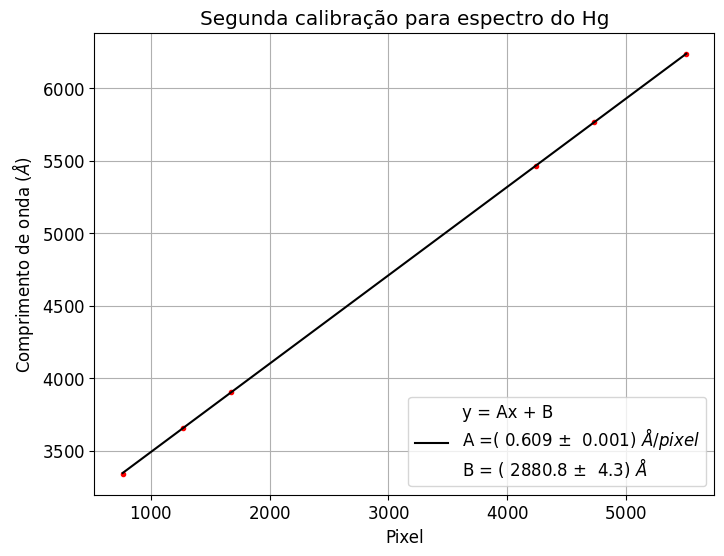

In [193]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
# grafico.plot(dados1.d()[0], dados1.d()[1], 'D', marker = '.', color = 'red')
# pontos = grafico.plot(dados1.dp()[0], dados1.dp()[1], 'D', marker = '.', color = 'blue')
grafico3 = grafico.plot(dados3.dp()[0], dados3.dp()[1], 'D', marker = '.', color = 'red')
# plot do ajuste
grafico.plot(dados3.x_model(), dados3.y_model(),  color = 'black', label = f'y = Ax + B\nA =({dados3.par()[0]: .3f} $\pm$ {dados3.perr()[0]: .1}) $\AA / pixel$ \nB = ({dados3.par()[1]: .1f} $\pm$ {dados3.perr()[1]: .2}) $\AA$')

grafico.grid(True)
grafico.set_xlabel('Pixel') # eixo x
grafico.set_ylabel('Comprimento de onda ($\AA$)') # eixo y
grafico.set_title('Segunda calibração para espectro do Hg') #título
grafico.legend(loc = 'lower right')



plt.show()


C:\Users\victo\AppData\Local\Temp\ipykernel_10484\3917097496.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico3 = grafico.plot(dados1.dp()[0], dados1.dp()[1], 'D', marker = '.', color = 'red')


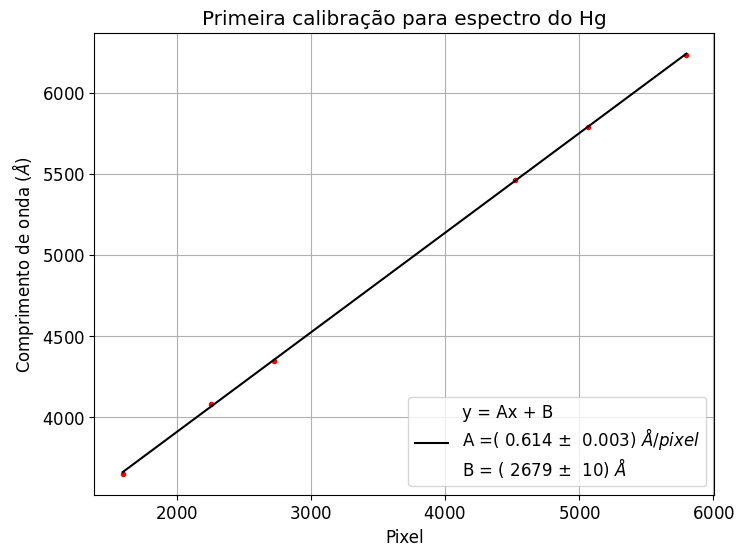

In [194]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
# grafico.plot(dados1.d()[0], dados1.d()[1], 'D', marker = '.', color = 'red')
# pontos = grafico.plot(dados1.dp()[0], dados1.dp()[1], 'D', marker = '.', color = 'blue')
grafico3 = grafico.plot(dados1.dp()[0], dados1.dp()[1], 'D', marker = '.', color = 'red')
# plot do ajuste
grafico.plot(dados1.x_model(), dados1.y_model(),  color = 'black', label = f'y = Ax + B\nA =({dados1.par()[0]: .3f} $\pm$ {dados1.perr()[0]: .1}) $\AA / pixel$ \nB = ({dados1.par()[1]: .0f} $\pm$ {dados1.perr()[1]: .0f}) $\AA$')

grafico.grid(True)
grafico.set_xlabel('Pixel') # eixo x
grafico.set_ylabel('Comprimento de onda ($\AA$)') # eixo y
grafico.set_title('Primeira calibração para espectro do Hg') #título
grafico.legend(loc = 'lower right')



plt.show()


C:\Users\victo\AppData\Local\Temp\ipykernel_10484\483046172.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  pontos = grafico.plot(dadosH1.dp()[0], dadosH1.dp()[1], 'D', marker = '.', color = 'red')


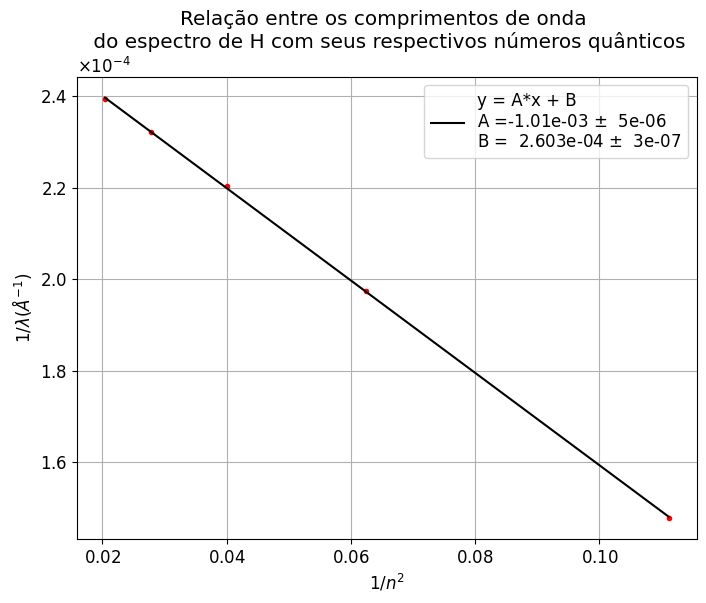

In [195]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
# grafico.plot(dados2.d()[0], dados2.d()[1], 'D', marker = '.', color = 'red')
pontos = grafico.plot(dadosH1.dp()[0], dadosH1.dp()[1], 'D', marker = '.', color = 'red')
# plot do ajuste
grafico.plot(dadosH1.x_model(), dadosH1.y_model(),  color = 'black', label = f'y = A*x + B \nA ={dadosH1.par()[0]: .2e} $\pm$ {dadosH1.perr()[0]: .0e}\nB = {dadosH1.par()[1]: .3e} $\pm$ {dadosH1.perr()[1]: .0e}')
#    grafico.errorbar(xData, yData, ls='None', color = 'red')
grafico.grid(True)
grafico.set_xlabel('$1/n^2$') # eixo x
grafico.set_ylabel('$1/\lambda (\AA^{-1})$') # eixo y
grafico.set_title('Relação entre os comprimentos de onda \n do espectro de H com seus respectivos números quânticos') #título
grafico.legend(loc = 'upper right')

plt.ticklabel_format(style='sci', axis='y', scilimits=(-4,-3),  useMathText=True)

plt.show()


C:\Users\victo\AppData\Local\Temp\ipykernel_10484\3774501698.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  pontos = grafico.plot(dadosNA3.dp()[0], dadosNA3.dp()[1], 'D', marker = '.', color = 'red')


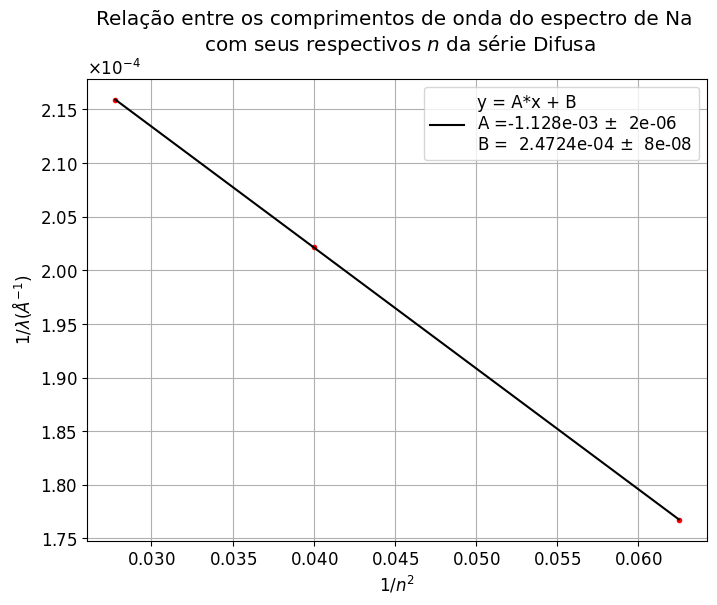

In [196]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
# grafico.plot(dados2.d()[0], dados2.d()[1], 'D', marker = '.', color = 'red')
pontos = grafico.plot(dadosNA3.dp()[0], dadosNA3.dp()[1], 'D', marker = '.', color = 'red')
# plot do ajuste
grafico.plot(dadosNA3.x_model(), dadosNA3.y_model(),  color = 'black', label = f'y = A*x + B \nA ={dadosNA3.par()[0]: .3e} $\pm$ {dadosNA3.perr()[0]: .0e}\nB = {dadosNA3.par()[1]: .4e} $\pm$ {dadosNA3.perr()[1]: .0e}')
#    grafico.errorbar(xData, yData, ls='None', color = 'red')
grafico.grid(True)
grafico.set_xlabel('$1/n^2$') # eixo x
grafico.set_ylabel('$1/\lambda (\AA^{-1})$') # eixo y
grafico.set_title('Relação entre os comprimentos de onda do espectro de Na \n com seus respectivos $\it{n}$ da série Difusa') #título
grafico.legend(loc = 'upper right')
plt.ticklabel_format(style='sci', axis='y', scilimits=(-4,-3),  useMathText=True)


plt.show()


In [229]:
dadosNA3.par()
R = -dadosNA3.par()[0]
sR = dadosNA3.perr()[0]
B = dadosNA3.par()[1]
sB = dadosNA3.perr()[1]
p = 3 - np.sqrt(R/dadosNA3.par()[1])

print(f'R = {R} \np = {p}')
sR

R = 0.0011276305825769486 
p = 0.864386949318583


1.6653407456832118e-06

In [198]:
Rl, Bl, sRl, sBl = symbols('R B sigma_R sigma_B')

p_expr =  3 - sqrt(Rl/Bl)
p_expr


3 - sqrt(R/B)

C:\Users\victo\AppData\Local\Temp\ipykernel_10484\1321368655.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  pontos = grafico.plot(dadosNA2.dp()[0], dadosNA2.dp()[1], 'D', marker = '.', color = 'red')


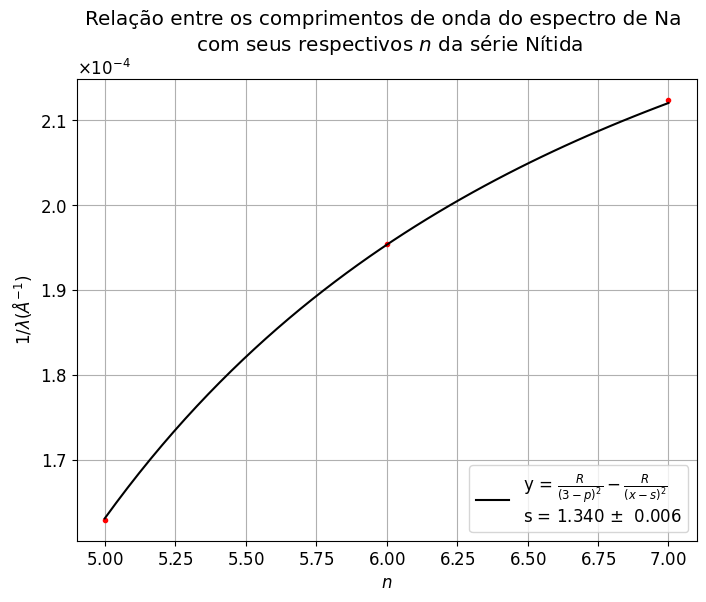

In [199]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
# grafico.plot(dados2.d()[0], dados2.d()[1], 'D', marker = '.', color = 'red')
pontos = grafico.plot(dadosNA2.dp()[0], dadosNA2.dp()[1], 'D', marker = '.', color = 'red')
# plot do ajuste
grafico.plot(dadosNA2.x_model(), dadosNA2.y_model(),  color = 'black', label = 'y = $\\frac{R}{(3-p)^2} - \\frac{R}{(x-s)^2}$' + f'\ns ={dadosNA2.par()[0]: .3f} $\pm$ {dadosNA2.perr()[0]: .3f}')
#    grafico.errorbar(xData, yData, ls='None', color = 'red')
grafico.grid(True)
grafico.set_xlabel('$n$') # eixo x
grafico.set_ylabel('$1/\lambda (\AA^{-1})$') # eixo y
grafico.set_title('Relação entre os comprimentos de onda do espectro de Na \n com seus respectivos $\it{n}$ da série Nítida') #título
grafico.legend(loc = 'lower right')
plt.ticklabel_format(style='sci', axis='y', scilimits=(-4,-3),  useMathText=True, useOffset=True)

plt.show()


In [200]:
1/np.array(dadosNA2.dp()[1])


array([4707.41539152, 5116.99320945, 6138.49979109])

C:\Users\victo\AppData\Local\Temp\ipykernel_10484\4074375701.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  pontos = grafico.plot(dadosNA1.dp()[0], dadosNA1.dp()[1],'D', marker = '.', color = 'red')


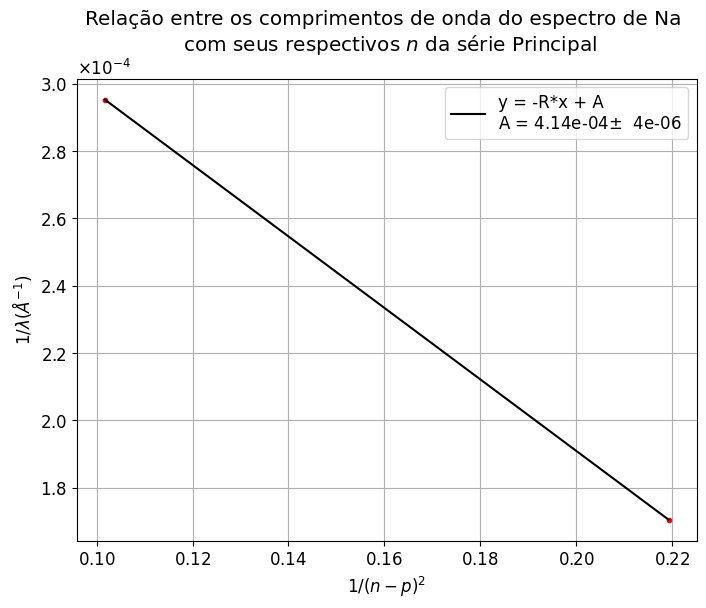

In [201]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
# grafico.plot(dados2.d()[0], dados2.d()[1], 'D', marker = '.', color = 'red')
pontos = grafico.plot(dadosNA1.dp()[0], dadosNA1.dp()[1],'D', marker = '.', color = 'red')
pontos = grafico.plot(dadosNA1.dp()[0], dadosNA1.dp()[1], color = 'black', label = f'y = -R*x + A \nA ={dadosNA1.par()[0]: .2e}$ \pm$ {dadosNA1.perr()[0]: .0e}')
#    grafico.errorbar(xData, yData, ls='None', color = 'red')
grafico.grid(True)
grafico.set_xlabel('$1/(n-p)^2$') # eixo x
grafico.set_ylabel('$1/\lambda (\AA^{-1})$') # eixo y
grafico.set_title('Relação entre os comprimentos de onda do espectro de Na \n com seus respectivos $\it{n}$ da série Principal') #título
grafico.legend(loc = 'upper right')

plt.ticklabel_format(style='sci', axis='y', scilimits=(-4,-3),  useMathText=True, useOffset=True)


plt.show()


In [221]:
A = dadosNA1.par()[0]
sA = dadosNA1.perr()[0]
s = 3 - np.sqrt(R/dadosNA1.par()[0])
s

1.3493037838501722

In [223]:
Rl, Al, sRl, sAl = symbols ('R A sigma_R sigma_A')

expr_s = 3 - sqrt(Rl/Al)
expr_s
dsdR = diff(expr_s, Rl)
dsdA = diff(expr_s, Al)
expr_ss = sqrt((dsdR*sRl)**2 + (dsdA*sAl)**2)
ss = expr_ss.subs([(Rl, R),(sRl, sR),(Al, A),(sAl,sA)])
ss

0.00782149172133052

In [203]:
Rl, pl, n, s, y = symbols('R p n s y')

In [204]:
dadosNA1.dp()
Rl, pl, n, s, y = symbols('R p n s y')
expr = Eq(y, -Rl/(3-pl)**2 + Rl/(n-s)**2)
expr



Eq(y, R/(n - s)**2 - R/(3 - p)**2)

In [205]:
denis = expr.subs([(y,dadosNA1.dp()[1][0]), (Rl, R), (pl,p), (n,3)])

solve(denis, s)

[1.35697589176898, 4.64302410823102]

In [206]:
Rl, pl, n, s, y = symbols('R p n s y')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


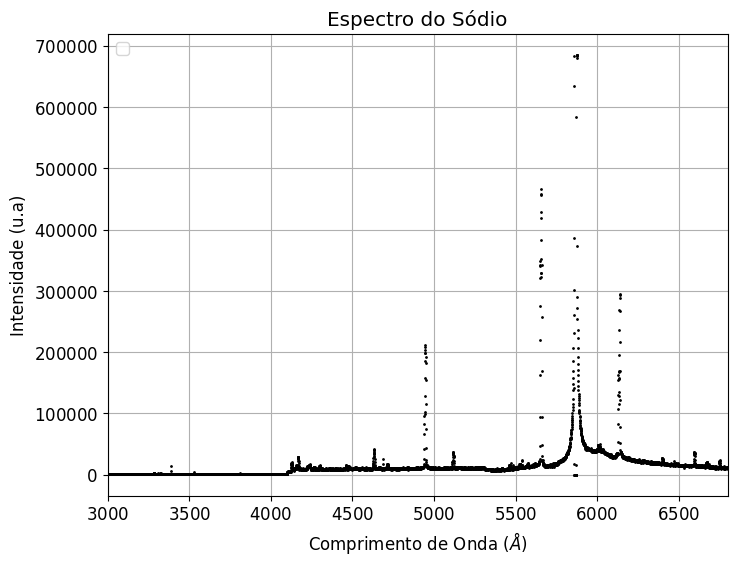

In [225]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
grafico3 = grafico.plot(dadosNA1.d()[0], dadosNA1.d()[1], marker = '.', markersize=2, color = 'black', linewidth = 0)

# plot do ajuste


grafico.grid(True)
grafico.set_xlabel('Comprimento de Onda ($\AA$)') # eixo x
grafico.set_ylabel('Intensidade (u.a)') # eixo y
grafico.set_title('Espectro do Sódio') #título
grafico.legend(loc = 'upper left')
plt.xlim(3000, 6800)

#    plt.savefig('Acr25graus.png')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


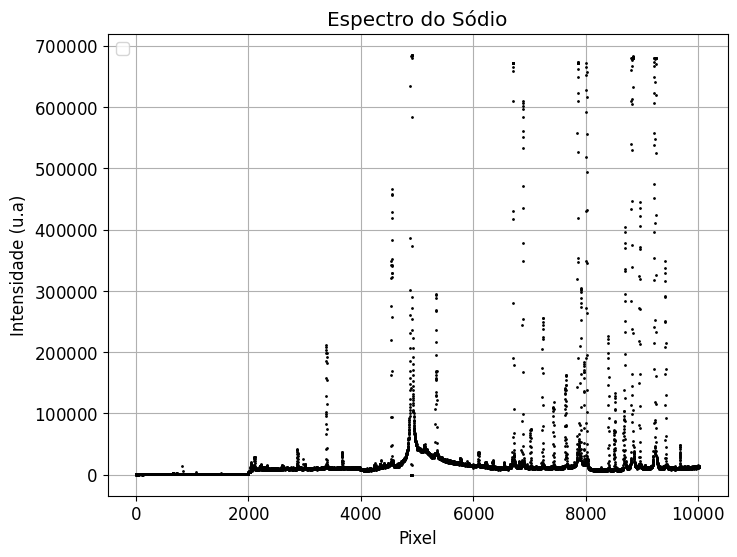

In [228]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
grafico3 = grafico.plot(dadosNA2.d()[0], dadosNA2.d()[1], marker = '.', markersize=2, color = 'black', linewidth = 0)

# plot do ajuste


grafico.grid(True)
grafico.set_xlabel('Pixel') # eixo x
grafico.set_ylabel('Intensidade (u.a)') # eixo y
grafico.set_title('Espectro do Sódio') #título
grafico.legend(loc = 'upper left')


#    plt.savefig('Acr25graus.png')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


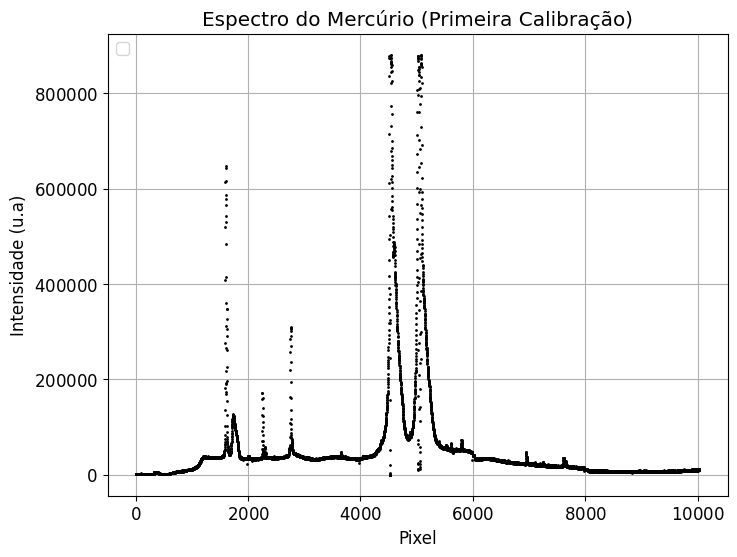

In [208]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
grafico3 = grafico.plot(dados1.d()[0], dados1.d()[1], marker = '.', markersize=2, color = 'black', linewidth = 0)

# plot do ajuste


grafico.grid(True)
grafico.set_xlabel('Pixel') # eixo x
grafico.set_ylabel('Intensidade (u.a)') # eixo y
grafico.set_title('Espectro do Mercúrio (Primeira Calibração)') #título
grafico.legend(loc = 'upper left')

#    plt.savefig('Acr25graus.png')
plt.show()
